<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
layer of a neural network that takes an input
### Hidden Layer: 
layer of a neural network that manipulates inputs using weights and biases
### Output Layer:
layer of a neural network that outputs a result 
### Neuron:
part of neural network that takes inputs from a layer and passes them on to the next layer if a certain threshold is met; functional pieces of input, hidden, and output layers; adds weights to inputs and passes to activation function
### Weight: 
how strong a given neuron should impact the overall result of the output
### Activation Function: 
generates final output after passed sum of products from all neuron firings; each neuron has its own activation function (typically each node/neuron in a given layer has the same activation function); decides whether a given node 'fires' or not, how much signal to pass on to next layer 
### Node Map: 
visual diagram/topography of a neural network; color-coded to highlight differences in architecture
### Perceptron: 
a single node/neuron of a neural network


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here
activation functions take inputs and manipulate them to an output using weights (similar to the slope of a linear function) and biases (similar to the intercept of a linear function).

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [2]:
# create dataframe

df = pd.DataFrame(np.array([[0, 0, 1],
                            [1, 0, 1],
                            [0, 1, 1],
                            [1, 1, 0]]),columns=['x1', 'x2', 'y'])

df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [3]:
# define X and y
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values

In [4]:
# import perceptron from lecture notebook
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

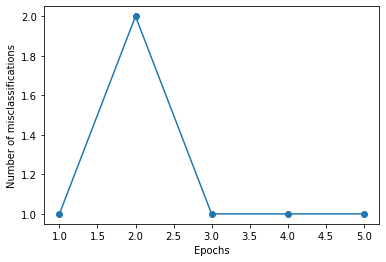

In [5]:
# create perceptron object, fit to X, y, graph
pn = Perceptron(.01, 5)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [6]:
# create dataframe from pima indians diabetes dataset

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df = df.values.astype(np.float)

In [11]:
# create X and y, convert to arrays
X = df.iloc[:,[0,1,2,3,4,5,6,7]].values.astype(np.float)
y = df.iloc[:,8].values.astype(np.float)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [12]:
# train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3, 2), (3,), (1, 2), (1,))

In [13]:
# fit to perceptron

diabetes = Perceptron(.1,100)
diabetes.fit(X_train, y_train)

In [14]:
prediction = diabetes.predict(X_test)
print("Accuracy Test Score:", prediction)

Accuracy Test Score: [1]


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?